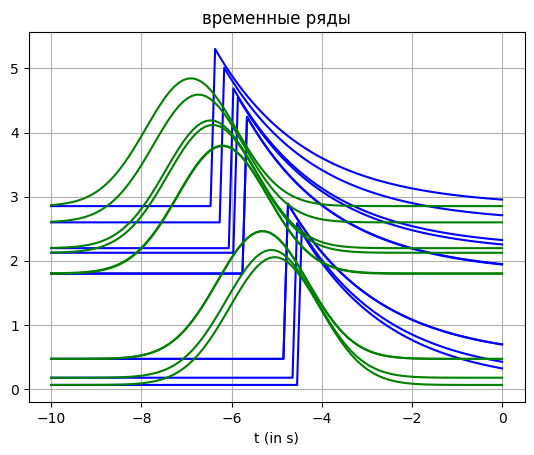

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

myseed = 42
random.seed(myseed)
np.random.seed(myseed)

def exponential(x, mu=0.5, lmbda=0.5):
    return lmbda * np.exp(-lmbda * (x - mu)) * (x >= mu)

def normal(x, mu=0, sigma=1):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

time_index = np.linspace(-10, 0, num=100)

tseries_list = {'Time': time_index}
arr_rand = np.random.random(size=11)

rand_const = np.random.randint(10, 20)
N = 10

for i in range(1, N + 1):
    tseries_list[f"exponential {i}"] = exponential(time_index + 2 * arr_rand[i] + 5) * 5 + arr_rand[i] * 3
for i in range(1, N + 1):
    tseries_list[f"normal {i}"] = normal(time_index + 2 * arr_rand[i] + 5) * 5 + arr_rand[i] * 3

for i in range(1, N + 1):
    plt.plot(time_index, tseries_list[f"exponential {i}"], '-b')
for i in range(1, N + 1):
    plt.plot(time_index, tseries_list[f"normal {i}"], '-g')

plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()
plt.show()


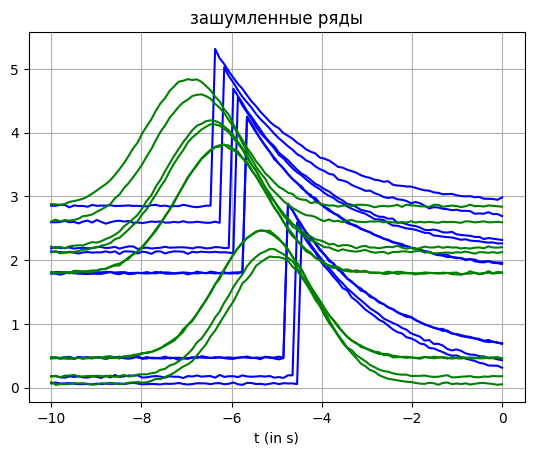

In [14]:
noise_std = 0.01  # Зашумление

for i in range(1, N + 1):
    tseries_list[f"exponential {i}"] = exponential(time_index + 2 * arr_rand[i] + 5) * 5 + arr_rand[i] * 3
    tseries_list[f"exponential {i}"] += np.random.normal(0, noise_std, size=len(time_index))
for i in range(1, N + 1):
    tseries_list[f"normal {i}"] = normal(time_index + 2 * arr_rand[i] + 5) * 5 + arr_rand[i] * 3
    tseries_list[f"normal {i}"] += np.random.normal(0, noise_std, size=len(time_index))

for i in range(1, N + 1):
    plt.plot(time_index, tseries_list[f"exponential {i}"], '-b')
for i in range(1, N + 1):
    plt.plot(time_index, tseries_list[f"normal {i}"], '-g')

plt.title(r'зашумленные ряды')
plt.xlabel(r't (in s)')
plt.grid()
plt.show()

In [15]:
def discovery_of_shapelets(ts, max, r, min=3, quality=0.05):
    w = [[[]]]
    d = []
    rShapelets = []
    l = max - min
    numC = 2
    p = r / numC
    for ts_i, i in enumerate(ts):
        shapelets = []
        for l in range(min,max + 1):
            w[i][l] = generate_shapelets_candidates(ts_i, l)
            for s in w[i][l]:
                d[s] = euclidean(s, w[i][l])
                quality = evaluate_candidate_shapelets(s, d[s])
                if quality >= 0.05:
                    shapelets.append([s, quality])
        shapelets = set(shapelets)
        shapelets = list(shapelets)
        rShapelets.extend(shapelets)


def generate_shapelets_candidates(ts_i, l):
    shapelets = []
    for i in range(len(ts_i) - l + 1):
        shapelets.append(ts_i[i:i+l])
    return shapelets

def evaluate_candidate_shapelets(s, d):
    entropy = calculate_entropy(s)
    information = calculate_information(s, d)
    quality = entropy * information

    return quality

def calculate_entropy(s):
    char_counts = {}
    for char in s:
        if char in char_counts:
            char_counts[char] += 1
        else:
            char_counts[char] = 1

    entropy = 0.0
    total_chars = len(s)

    for count in char_counts.values():
        probability = count / total_chars
        entropy -= probability * math.log2(probability)

    return entropy

def calculate_information(s, d):
    information = len(s) / d
    return information
